In [6]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [9]:
import yfinance as yf

In [12]:
dir(yf)

['EquityQuery',
 'Industry',
 'Screener',
 'Sector',
 'Ticker',
 'Tickers',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'base',
 'cache',
 'const',
 'data',
 'domain',
 'download',
 'enable_debug_mode',
 'exceptions',
 'multi',
 'scrapers',
 'screener',
 'set_tz_cache_location',
 'shared',
 'ticker',
 'tickers',
 'utils',
 'version',
 'warnings']

In [15]:
df=yf.download('AAPL',start='2021-01-01',end='2024-01-01',interval='1d'
              )

[*********************100%***********************]  1 of 1 completed


In [17]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2021-01-04,126.544212,129.410004,133.610001,126.760002,133.520004,143301900
2021-01-05,128.108780,131.009995,131.740005,128.429993,128.889999,97664900
2021-01-06,123.796432,126.599998,131.050003,126.379997,127.720001,155088000
2021-01-07,128.020767,130.919998,131.630005,127.860001,128.360001,109578200
2021-01-08,129.125748,132.050003,132.630005,130.229996,132.429993,105158200


In [19]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-12-22,192.656174,193.600006,195.410004,192.970001,195.179993,37122800
2023-12-26,192.108841,193.050003,193.889999,192.830002,193.610001,28919300
2023-12-27,192.208374,193.149994,193.500000,191.089996,192.490005,48087700
2023-12-28,192.636276,193.580002,194.660004,193.169998,194.139999,34049900
2023-12-29,191.591385,192.529999,194.399994,191.729996,193.899994,42628800


In [22]:
df1=df.reset_index()['Close']
df1

Ticker,AAPL
0,129.410004
1,131.009995
2,126.599998
3,130.919998
4,132.050003
...,...
748,193.600006
749,193.050003
750,193.149994
751,193.580002


In [25]:
df1.shape

(753, 1)

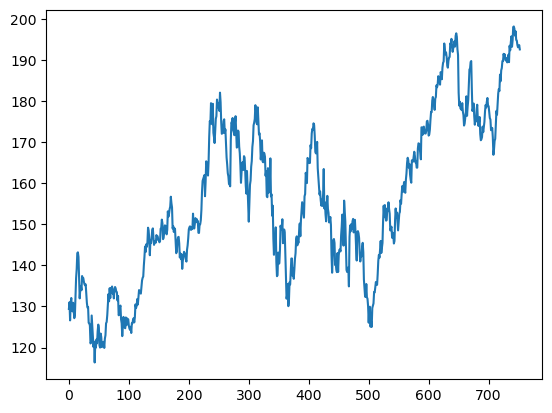

In [28]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [31]:
import numpy as np


In [34]:
df1

Ticker,AAPL
0,129.410004
1,131.009995
2,126.599998
3,130.919998
4,132.050003
...,...
748,193.600006
749,193.050003
750,193.149994
751,193.580002


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [40]:
print(df1)

[[0.15963306]
 [0.17920482]
 [0.12525991]
 [0.17810395]
 [0.19192664]
 [0.15437303]
 [0.15217128]
 [0.17773699]
 [0.15351686]
 [0.13186543]
 [0.14030583]
 [0.19168193]
 [0.25088678]
 [0.27779825]
 [0.32489294]
 [0.32782878]
 [0.31437305]
 [0.25357793]
 [0.19082576]
 [0.21749234]
 [0.22788997]
 [0.21504589]
 [0.25724769]
 [0.24954121]
 [0.25137618]
 [0.2403669 ]
 [0.23278286]
 [0.2296025 ]
 [0.23253816]
 [0.20587158]
 [0.17712533]
 [0.16330283]
 [0.16525987]
 [0.11792048]
 [0.11620795]
 [0.10996939]
 [0.05663605]
 [0.05993886]
 [0.13981652]
 [0.10715599]
 [0.06972473]
 [0.04611617]
 [0.06189599]
 [0.        ]
 [0.05785927]
 [0.04428138]
 [0.06850151]
 [0.05712536]
 [0.0933333 ]
 [0.11266054]
 [0.10275231]
 [0.05100915]
 [0.04440364]
 [0.08599387]
 [0.07559633]
 [0.04562686]
 [0.05174307]
 [0.0593272 ]
 [0.06152904]
 [0.04330276]
 [0.0708257 ]
 [0.08122323]
 [0.11669726]
 [0.12048928]
 [0.14116209]
 [0.17125382]
 [0.20354739]
 [0.18201841]
 [0.22103966]
 [0.19168193]
 [0.22189602]
 [0.21

In [43]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [46]:
training_size,test_size

(489, 264)

In [49]:
train_data

array([[0.15963306],
       [0.17920482],
       [0.12525991],
       [0.17810395],
       [0.19192664],
       [0.15437303],
       [0.15217128],
       [0.17773699],
       [0.15351686],
       [0.13186543],
       [0.14030583],
       [0.19168193],
       [0.25088678],
       [0.27779825],
       [0.32489294],
       [0.32782878],
       [0.31437305],
       [0.25357793],
       [0.19082576],
       [0.21749234],
       [0.22788997],
       [0.21504589],
       [0.25724769],
       [0.24954121],
       [0.25137618],
       [0.2403669 ],
       [0.23278286],
       [0.2296025 ],
       [0.23253816],
       [0.20587158],
       [0.17712533],
       [0.16330283],
       [0.16525987],
       [0.11792048],
       [0.11620795],
       [0.10996939],
       [0.05663605],
       [0.05993886],
       [0.13981652],
       [0.10715599],
       [0.06972473],
       [0.04611617],
       [0.06189599],
       [0.        ],
       [0.05785927],
       [0.04428138],
       [0.06850151],
       [0.057

In [52]:
test_data

array([[0.34409792],
       [0.35608563],
       [0.32844044],
       [0.24636085],
       [0.22201827],
       [0.19584091],
       [0.19498474],
       [0.23351677],
       [0.19412838],
       [0.18960245],
       [0.1672171 ],
       [0.11840979],
       [0.16207951],
       [0.16599379],
       [0.10654433],
       [0.12232416],
       [0.10593267],
       [0.16220177],
       [0.16868493],
       [0.17577976],
       [0.20954134],
       [0.20856273],
       [0.22507638],
       [0.23951073],
       [0.23058111],
       [0.23131503],
       [0.2631192 ],
       [0.30275229],
       [0.3201223 ],
       [0.31192661],
       [0.33761475],
       [0.36171244],
       [0.32587155],
       [0.34165129],
       [0.35559623],
       [0.42152913],
       [0.46654434],
       [0.43266049],
       [0.46837912],
       [0.43498468],
       [0.42214061],
       [0.42385314],
       [0.45859334],
       [0.45064216],
       [0.47669726],
       [0.45688081],
       [0.44269116],
       [0.392

In [55]:
print(test_data.shape)

(264, 1)


In [58]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [61]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [64]:
print(X_train.shape), print(y_train.shape)

(388, 100)
(388,)


(None, None)

In [95]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional


In [160]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [162]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [164]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - loss: 0.1474 - val_loss: 0.0166
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0233 - val_loss: 0.0802
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0171 - val_loss: 0.0284
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0098 - val_loss: 0.0173
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0102 - val_loss: 0.0405
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0100 - val_loss: 0.0259
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0089 - val_loss: 0.0159
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0093 - val_loss: 0.0253
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0080 - val_loss: 0.0144
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0082 - val_loss: 0.0232
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0088 - val_loss: 0.0122
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0073 - val_l

In [168]:
import tensorflow as tf


In [170]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [172]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [174]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

154.46330336973088

In [176]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

181.17930269814985

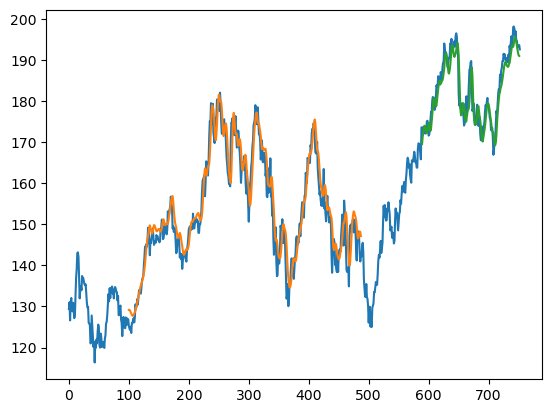

In [178]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [180]:
len(test_data)

264

In [182]:
x_input=test_data[164:].reshape(1,-1)
x_input.shape

(1, 100)

In [184]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [186]:
temp_input


[0.7563302976275801,
 0.7536391511969609,
 0.7514372192756116,
 0.7718655180858178,
 0.7472782426653288,
 0.7365138435947056,
 0.7050764451333142,
 0.7110703961200304,
 0.7275840455968079,
 0.7445870962347092,
 0.7921711866279626,
 0.7341896547090023,
 0.761467889908257,
 0.7807951294318616,
 0.8288684343343844,
 0.8720488475367927,
 0.8747399939674119,
 0.8941896771072249,
 0.897125337466552,
 0.8140673156178324,
 0.7486238158806384,
 0.7562078540113721,
 0.7706422018348622,
 0.7332110390386086,
 0.7076453345995795,
 0.7263609159977062,
 0.717431117999809,
 0.7536391511969609,
 0.7670948833500573,
 0.7233028120221712,
 0.7042200864272745,
 0.7147399715691893,
 0.7305198926079894,
 0.6801223988197629,
 0.6614066307697821,
 0.6645871783615251,
 0.6709480868931572,
 0.7020183411577792,
 0.6855045050291473,
 0.700917468523031,
 0.7162079884007073,
 0.7477676438264527,
 0.7661162676796636,
 0.7587767434776373,
 0.776024494696101,
 0.7871560379634936,
 0.7644037369194381,
 0.762813463123566

In [188]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.91784143]
101
1 day input [0.75363915 0.75143722 0.77186552 0.74727824 0.73651384 0.70507645
 0.7110704  0.72758405 0.7445871  0.79217119 0.73418965 0.76146789
 0.78079513 0.82886843 0.87204885 0.87473999 0.89418968 0.89712534
 0.81406732 0.74862382 0.75620785 0.7706422  0.73321104 0.70764533
 0.72636092 0.71743112 0.75363915 0.76709488 0.72330281 0.70422009
 0.71473997 0.73051989 0.6801224  0.66140663 0.66458718 0.67094809
 0.70201834 0.68550451 0.70091747 0.71620799 0.74776764 0.76611627
 0.75877674 0.77602449 0.78715604 0.76440374 0.76281346 0.74360848
 0.72758405 0.72293585 0.6913762  0.69284403 0.69822632 0.66960251
 0.61810396 0.6343731  0.6596941  0.66556579 0.70470949 0.74874626
 0.73749227 0.76905193 0.80073403 0.81382262 0.80795111 0.85675833
 0.83718657 0.86948014 0.87645252 0.89724778 0.89700308 0.91853207
 0.90862384 0.91681953 0.90042814 0.89822621 0.90568799 0.89308862
 0.90018344 0.91596336 0.89382253 0.94262994 0.92917439 0.95302757
 0.97064228 0.93969409 0.95840986

In [189]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [192]:
import matplotlib.pyplot as plt


In [194]:
len(df1)


753

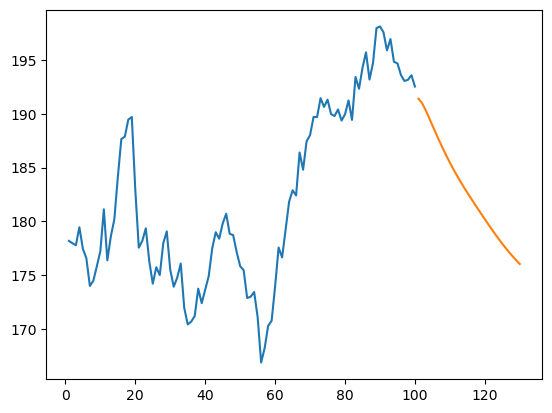

In [196]:
plt.plot(day_new,scaler.inverse_transform(df1[653:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

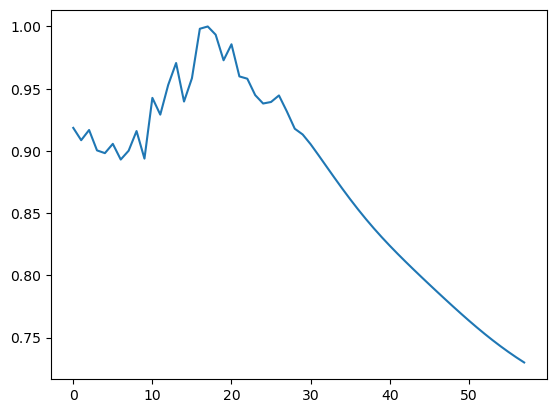

In [198]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[725:])

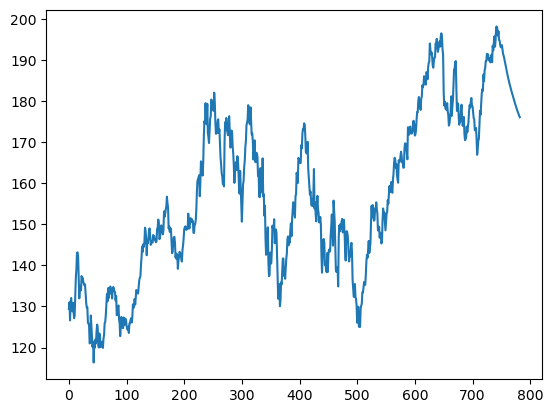

In [200]:
 df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

In [ ]:
#To improve the above model we can apply Bidirectional lSTM model 

In [205]:
#Birectional Lstm model implementation
model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Bidirectional(LSTM(50)),
    Dense(1)
])

In [207]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional) │ (None, 100, 100)       │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 100)            │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,301 (317.58 KB)

 Trainable params: 81,301 (317.58 KB)

 Non-trainable params: 0 (0.00 B)

In [213]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [215]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - loss: 0.1459 - val_loss: 0.0185
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0233 - val_loss: 0.0544
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0137 - val_loss: 0.0283
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0088 - val_loss: 0.0092
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0084 - val_loss: 0.0252
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0073 - val_loss: 0.0194
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0067 - val_loss: 0.0071
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0060 - val_loss: 0.0128
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0047 - val_loss: 0.0089
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0043 - val_loss: 0.0068
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0043 - val_loss: 0.0052
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0041

In [219]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, ytest, verbose=0)

In [224]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [227]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [230]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

152.84229403373672

In [233]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

179.56199819670894

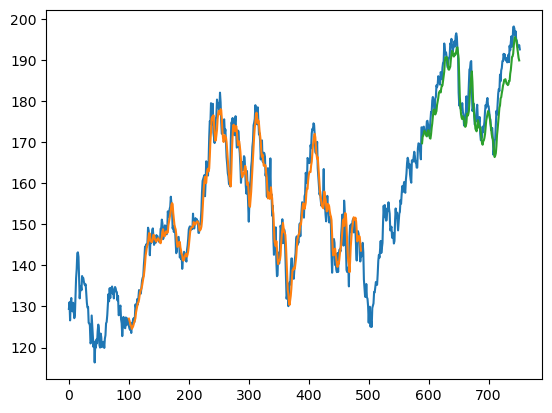

In [236]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [239]:
x_input=test_data[164:].reshape(1,-1)
x_input.shape

(1, 100)

In [242]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [245]:
temp_input


[0.7563302976275801,
 0.7536391511969609,
 0.7514372192756116,
 0.7718655180858178,
 0.7472782426653288,
 0.7365138435947056,
 0.7050764451333142,
 0.7110703961200304,
 0.7275840455968079,
 0.7445870962347092,
 0.7921711866279626,
 0.7341896547090023,
 0.761467889908257,
 0.7807951294318616,
 0.8288684343343844,
 0.8720488475367927,
 0.8747399939674119,
 0.8941896771072249,
 0.897125337466552,
 0.8140673156178324,
 0.7486238158806384,
 0.7562078540113721,
 0.7706422018348622,
 0.7332110390386086,
 0.7076453345995795,
 0.7263609159977062,
 0.717431117999809,
 0.7536391511969609,
 0.7670948833500573,
 0.7233028120221712,
 0.7042200864272745,
 0.7147399715691893,
 0.7305198926079894,
 0.6801223988197629,
 0.6614066307697821,
 0.6645871783615251,
 0.6709480868931572,
 0.7020183411577792,
 0.6855045050291473,
 0.700917468523031,
 0.7162079884007073,
 0.7477676438264527,
 0.7661162676796636,
 0.7587767434776373,
 0.776024494696101,
 0.7871560379634936,
 0.7644037369194381,
 0.762813463123566

In [248]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.89004123]
101
1 day input [0.75363915 0.75143722 0.77186552 0.74727824 0.73651384 0.70507645
 0.7110704  0.72758405 0.7445871  0.79217119 0.73418965 0.76146789
 0.78079513 0.82886843 0.87204885 0.87473999 0.89418968 0.89712534
 0.81406732 0.74862382 0.75620785 0.7706422  0.73321104 0.70764533
 0.72636092 0.71743112 0.75363915 0.76709488 0.72330281 0.70422009
 0.71473997 0.73051989 0.6801224  0.66140663 0.66458718 0.67094809
 0.70201834 0.68550451 0.70091747 0.71620799 0.74776764 0.76611627
 0.75877674 0.77602449 0.78715604 0.76440374 0.76281346 0.74360848
 0.72758405 0.72293585 0.6913762  0.69284403 0.69822632 0.66960251
 0.61810396 0.6343731  0.6596941  0.66556579 0.70470949 0.74874626
 0.73749227 0.76905193 0.80073403 0.81382262 0.80795111 0.85675833
 0.83718657 0.86948014 0.87645252 0.89724778 0.89700308 0.91853207
 0.90862384 0.91681953 0.90042814 0.89822621 0.90568799 0.89308862
 0.90018344 0.91596336 0.89382253 0.94262994 0.92917439 0.95302757
 0.97064228 0.93969409 0.95840986

In [251]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [254]:
import matplotlib.pyplot as plt


In [257]:
len(df1)


753

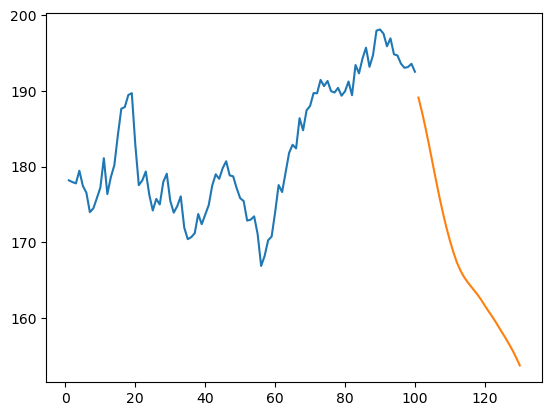

In [260]:
plt.plot(day_new,scaler.inverse_transform(df1[653:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

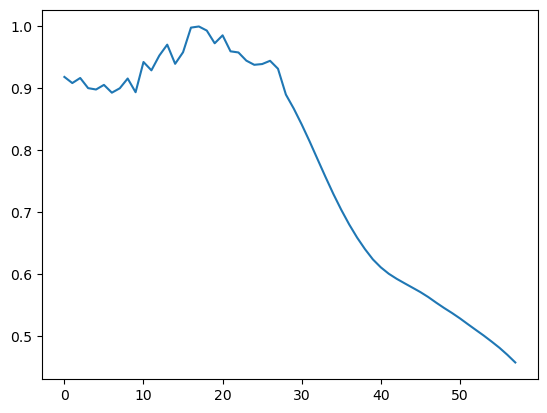

In [263]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[725:])

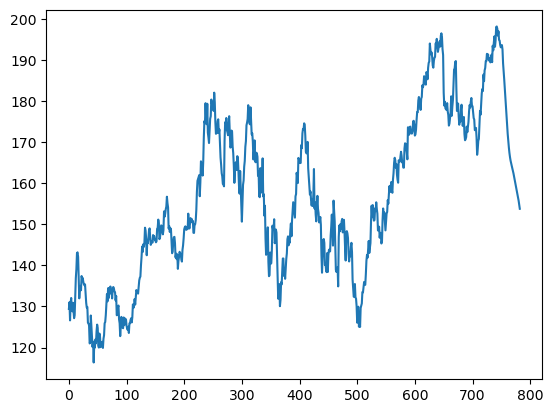

In [266]:
 df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)